# Assignment 4

### Chandan Kumar Sahu
### Roll No. 1911055

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
from Chandan_Library_As4 import *


# Question 1 - Pseudo random numbers by Linear Congruent Generators


In [2]:
def mlcg(n, a=420, m=69420, seed=1, start=0, stop=1):
    random_numbers = []
    x = seed
    
    for _ in range(n):
        x = (a * x ) % m
        random_numbers.append(start + (stop - start) * (x / m))  # Scaling to the range [start, stop)
    
    return random_numbers


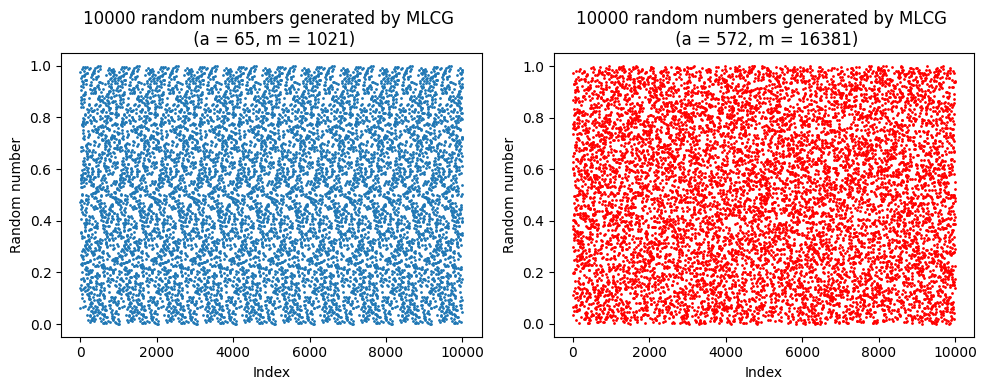

In [3]:
random_numbers_1= mlcg(10000, a = 65, m = 1021, seed=1, start=0, stop=1)
random_numbers_2 = mlcg(10000, a = 572, m = 16381, seed=1, start=0, stop=1)

plt.figure(figsize=[10, 4])
plt.subplot(1, 2, 1)
plt.plot(random_numbers_1, '.', markersize=2)
plt.title('10000 random numbers generated by MLCG \n (a = 65, m = 1021)')
plt.xlabel('Index')
plt.ylabel('Random number')

plt.subplot(1, 2, 2)
plt.plot(random_numbers_2, 'r.', markersize=2)
plt.title('10000 random numbers generated by MLCG \n (a = 572, m = 16381)')
plt.xlabel('Index')
plt.ylabel('Random number')

plt.tight_layout()


# Question 2 - Monte Carlo Integration

In [4]:
def monte_carlo(f, pdf, n, a, m, seed, start, stop):
    integral_sum, error = 0, 0
    
    random_numbers = mlcg(n, a, m, seed, start, stop)
    for rand_num in range(len(random_numbers)):
        integral_sum += f(random_numbers[rand_num]) / pdf(random_numbers[rand_num])
        error += ( ( (f(random_numbers[rand_num])**2) / n) - (f(random_numbers[rand_num])/n)**2 )
    error = np.sqrt(error)

    # Estimate the integral
    integral_estimate = integral_sum / n
    
    return integral_estimate, error



Estimated integral: 2.000282263750614


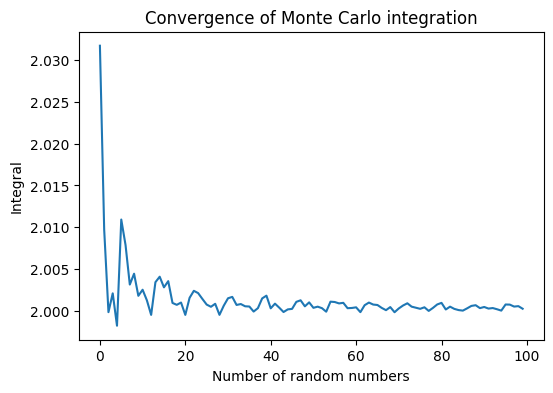

In [5]:
def f(x):
    return np.cos(x)

def pdf(x):  # pdf
    return 1 / (stop - start)

# Define the integration limits 
start = -np.pi/ 2
stop = np.pi/ 2

convergence = []
for n in range(1000, 100001, 1000):
    integral = monte_carlo(f, pdf, n, a=572, m=16381, seed=1, start=start, stop=stop)[0]
    convergence.append(integral)

print("Estimated integral:", integral)

plt.figure(figsize=(6, 4))
plt.plot(convergence)
plt.title('Convergence of Monte Carlo integration')
plt.xlabel('Number of random numbers')
plt.ylabel('Integral')
plt.show()


# Question 3 - Inverse transform method


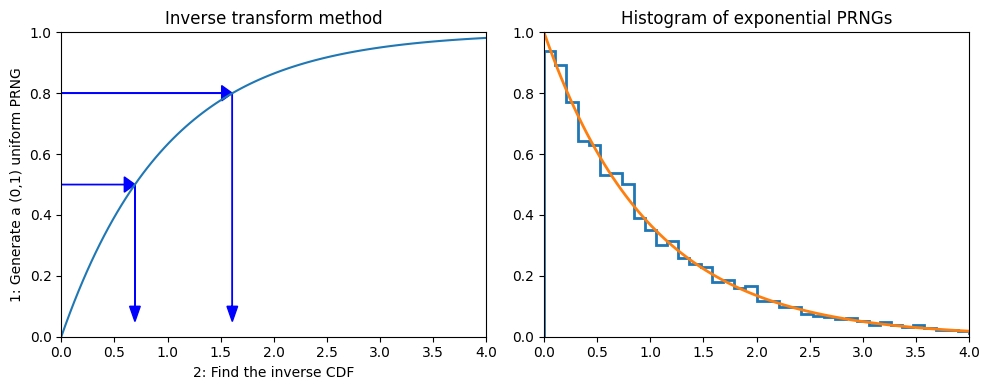

In [15]:
import numpy as np

def expon_pdf(x, lmabd=1):
    """PDF of exponential distribution."""
    return lmabd*np.exp(-lmabd*x)

def expon_cdf(x, lambd=1):
    """CDF of exponetial distribution."""
    return 1 - np.exp(-lambd*x)

def expon_icdf(p, lambd=1):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-p)/lambd


import scipy.stats as stats

dist = stats.expon()
x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

# with plt.xkcd():
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(x, expon_cdf(x))
plt.axis([0, 4, 0, 1])
for q in [0.5, 0.8]:
    plt.arrow(0, q, expon_icdf(q)-0.1, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
    plt.arrow(expon_icdf(q), q, 0, -q+0.1, head_width=0.1, head_length=0.05, fc='b', ec='b')
plt.ylabel('1: Generate a (0,1) uniform PRNG')
plt.xlabel('2: Find the inverse CDF')
plt.title('Inverse transform method')

plt.subplot(122)
u = np.random.random(10000)
v = expon_icdf(u)
plt.hist(v, histtype='step', bins=100, density=True,linewidth=2)
plt.plot(x, expon_pdf(x), linewidth=2)
plt.axis([0,4,0,1])
plt.title('Histogram of exponential PRNGs')

plt.tight_layout()
plt.show()

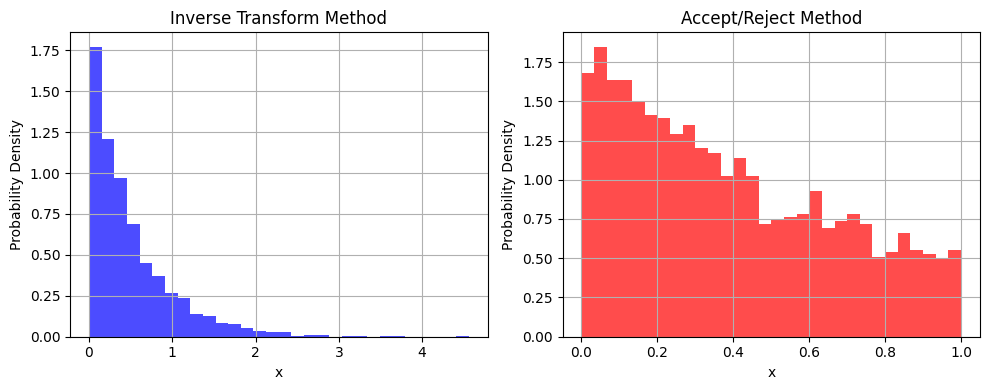

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Inverse Transform Method
def inverse_transform_exp(n):
    u = np.random.uniform(0, 1, n)
    return -np.log(1 - u) / 2

# Accept/Reject Method
def accept_reject_exp(n):
    samples = []
    while len(samples) < n:
        v = np.random.uniform(0, 1)  # Sample from q(x)
        u = np.random.uniform(0, 1)
        if u <= np.exp(-2 * v) / (2 - v):
            samples.append(v)
    return np.array(samples)

# Generate samples using both methods
n_samples = 2000
samples_inv_transform = inverse_transform_exp(n_samples)
samples_accept_reject = accept_reject_exp(n_samples)

# Plot histograms
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(samples_inv_transform, bins=30, density=True, color='blue', alpha=0.7)
plt.title('Inverse Transform Method')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(samples_accept_reject, bins=30, density=True, color='red', alpha=0.7)
plt.title('Accept/Reject Method')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)

plt.tight_layout()
plt.show()


# Question 4 - Monte Cralo Integration


In [6]:
def f(x):
    return np.exp(-2*x) / ( 1 + x**2)

def pdf(x):  # pdf
    return 0.5

start = 0
stop = 2
N = 100000

integral, var = monte_carlo(f, pdf, n, a=572, m=16381, seed=1, start=start, stop=stop)

print("Estimated integral:", integral)
print("Variance of the estimate:", var)


Estimated integral: 0.3975378136710437
Variance of the estimate: 0.3270108422588269


In [7]:
def f(x):
    return np.exp(-2*x) / ( 1 + x**2)

def pdf(x):  # pdf
    return np.exp(-x)

start = 0
stop = 2
N = 100000

integral, var = monte_carlo(f, pdf, n, a=572, m=16381, seed=1, start=start, stop=stop)

print("Estimated integral:", integral)
print("Variance of the estimate:", var)


Estimated integral: 0.3025781400891192
Variance of the estimate: 0.3270108422588269


In [8]:
def f(x):
    return np.exp(-2*x) / ( 1 + x**2)

def pdf(x):  # pdf
    return np.exp(-x/2)/ (2 * (1-np.exp(-1/2)) )

start = 0
stop = 2
N = 100000

integral, var = monte_carlo(f, pdf, n, a=572, m=16381, seed=1, start=start, stop=stop)

print("Estimated integral:", integral)
print("Variance of the estimate:", var)


Estimated integral: 0.18961912030043165
Variance of the estimate: 0.3270108422588269
